
# Исследование результатов рекламных кампаний

В имеющемся файле представлены данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в приложение.

# Цель исследования
Исследовать данные и получить из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров. Пример вопросов, на которые можно найти ответы: кампании в каких гео показали себя хуже всего? Кто из медиабайеров лучше всего окупается? У каких кампаний дешевле установки (CPI)? И т.д.
Для того, чтобы сформулировать как можно больше вопросов и провести более полный анализ, советуем почитать про основные маркетинговые метрики, если вы еще с ними не знакомы.  

# Описание данных

Имеющиеся поля:
* `Campaign_id` - ID кампании;
* `Geo` - геопозиция, на которую настроена рекламная кампания;
* `Buyer` - байер, выполнивший запуск;
* `Impressions` - количество показов рекламных объявлений;
* `Clicks` - количество кликов;
* `Installs` - количество установок;
* `Registrations` - количество регистраций;
* `Spend` - Затраченная сумма;
* `Revenue_ad (1d/7d/30d)` - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;
* `Revenue_in_app (1d/7d/30d)` - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;
* `Payers (1d/7d/30d)` - Количество покупателей в приложении на 1/7/30 день их жизни.

# Этапы исследования
1. Обзор данных
2. Анализ данных
3. Общий вывод

## Обзор данных

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# сохраним данные в переменной data

data = pd.read_csv('/content/gdrive/MyDrive/Работа/Topface/test_data.csv')

In [ ]:
# 10 первых строк датасета

data.head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6
5,6,north america,buyer_2,79419,2124,1110,745,"556,720001","237,204412","9,77",3,"315,078178","26,550001",4,"389,36361","26,550001",4
6,7,north america,buyer_3,88809,3113,926,603,"525,51001","252,857545","15,37",3,"361,393394","32,160001",3,"433,87208","32,160001",3
7,8,north america,buyer_3,113917,3966,1249,854,"521,509998","306,853212","30,78",2,"484,534634","39,17",3,"770,979189","47,56",4
8,9,north america,buyer_2,65516,1717,905,685,"460,33","186,115059","25,129999",6,"274,565038","29,999999",9,"352,509658","60,35",10
9,10,north america,buyer_2,64739,1899,928,539,"416,130001","177,430283",0,0,"240,487613",0,0,"268,50108",0,0


In [ ]:
# общая информация о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

Колонки `Spend`, `Revenue_ad1d`, `Revenue_in_app1d`, `Revenue_ad7d`, `Revenue_in_app7d`, `Revenue_ad30d`, `Revenue_in_app30d` имеют строкойвый тип. Переведем их в тип `float`.

In [ ]:
# создаем список упомянутых колонок

columns = ['Spend', 'Revenue_ad1d', 'Revenue_in_app1d', 'Revenue_ad7d',\
           'Revenue_in_app7d', 'Revenue_ad30d', 'Revenue_in_app30d']

In [ ]:
# меняем запятную в значениях на точку, чтобы мы погли преобразовать значения в число

for c in columns:
  data[c] = data[c].str.replace(',', '.').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

**Вывод**

Пропусков в данных нет. Некоторые колонки с числами имели строковый тип - заменили на тип `float`.

## Анализ данных

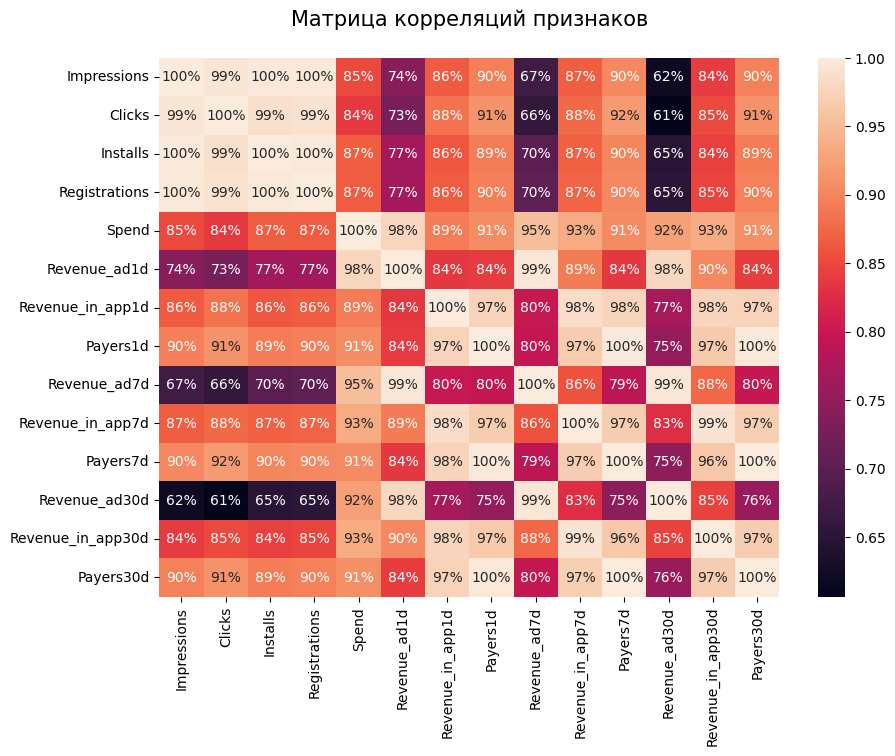

In [ ]:
# посмотрим на матрицу корреляций признаков

plt.figure(figsize=(10, 7))
sns.heatmap(data.drop('Campaign_id', axis=1).corr(), annot=True, fmt='.0%')
plt.title('Матрица корреляций признаков'+'\n', fontsize=15);

Затраты на рекламу сильнее всего коррелируют с `Revenue_ad1d` и `Revenue_ad7d` (98% и 95% соответственно). Можно предположить, что первую неделю наибольшая отдача в плане выручки идет именно за счет рекламы, а далее, вероятно, существует инерция, и выручка уже больше растет за счет покупок от пользователей.

Посмотрим распределение рекламных кампаний по регионам.

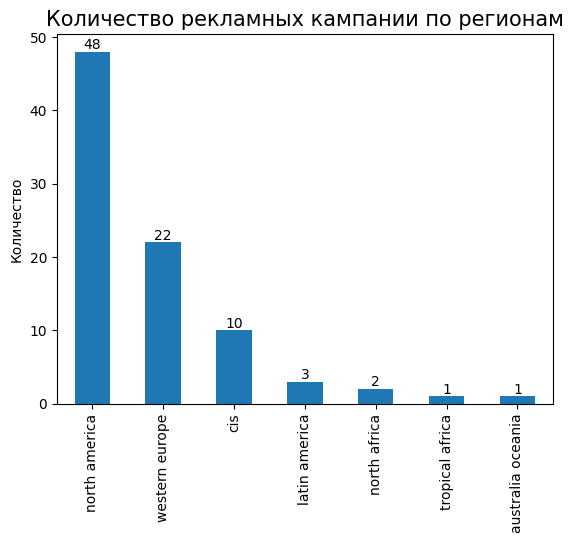

In [ ]:
# столбчатая диаграмма с кол-вом кампаний по регионам

ax = data['Geo'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Количество рекламных кампании по регионам', fontsize=15)
plt.ylabel('Количество');

Посчитаем доли регионов в общем числе кампаний.

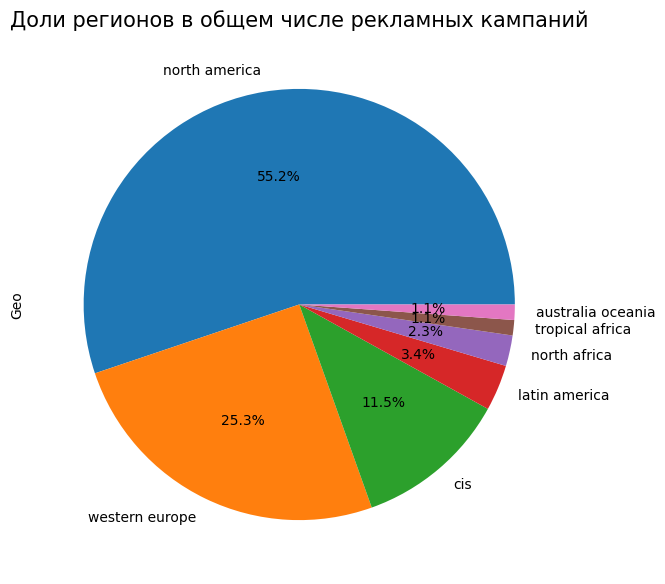

In [ ]:
# круговая диаграммма с долями регионов в общем числе кампаний

plt.figure(figsize=(10, 7))
data['Geo'].value_counts().plot(kind='pie', autopct='%.1f%%')
#plt.legend()
plt.title('Доли регионов в общем числе рекламных кампаний', fontsize=15);

Больше всего кампаний настроены на Северную Америку (55%). Следом идет Западная Европа (25%).

Теперь изучим участие медиабаеров в кампаниях.

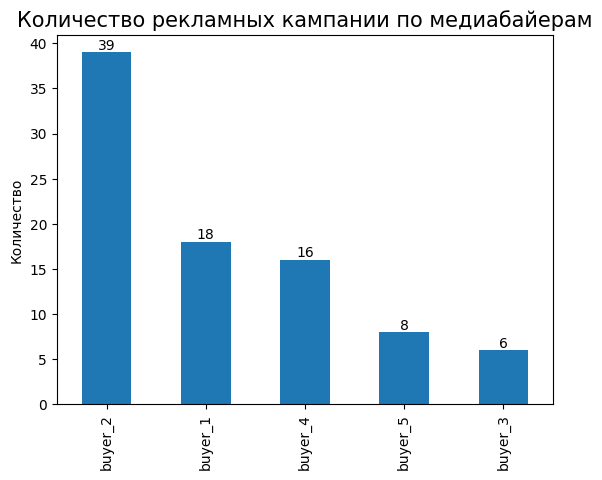

In [ ]:
# столбчатая диаграмма с кол-вом кампаний по байерам

ax = data['Buyer'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Количество рекламных кампании по медиабайерам', fontsize=15)
plt.ylabel('Количество');

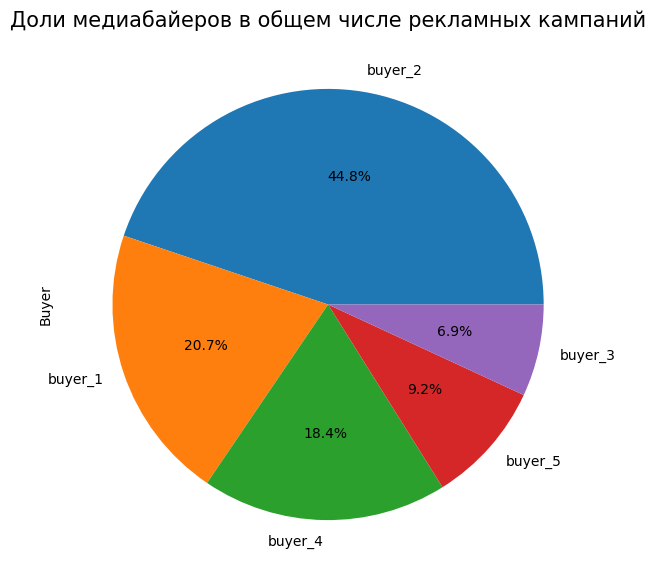

In [ ]:
# круговая диаграммма с долями байеров в общем числе кампаний

plt.figure(figsize=(10, 7))
data['Buyer'].value_counts().plot(kind='pie', autopct='%.1f%%')
#plt.legend()
plt.title('Доли медиабайеров в общем числе рекламных кампаний', fontsize=15);

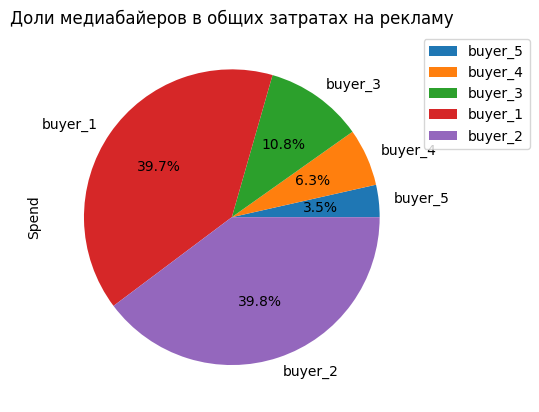

In [ ]:
# посчитаем доли медиабайеров в общих затратах на рекламу

data.groupby('Buyer')[['Spend']].sum().sort_values('Spend').\
plot(kind='pie', y='Spend', autopct='%.1f%%')
plt.title('Доли медиабайеров в общих затратах на рекламу')
plt.legend(bbox_to_anchor=(1, 1));

По числу кампаний лидирует `buyer_2` (44%), затем идет `buyer_1` (20%). По общим затартам `buyer_1` и `buyer_2` делят 1 место (почти по 40%). 2 место у `buyer_3` (10%).

Посмторим доли затрат на рекламу по гео.

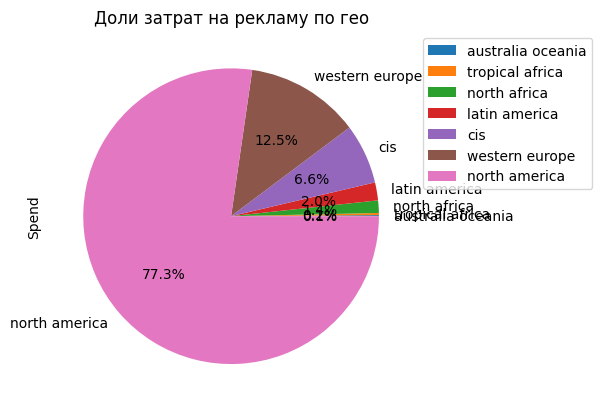

In [ ]:
data.groupby('Geo')[['Spend']].sum().sort_values('Spend').\
plot(kind='pie', y='Spend', autopct='%.1f%%')
plt.title('Доли затрат на рекламу по гео')
plt.legend(bbox_to_anchor=(1, 1));

На 1 месте Северная Америка (77%). На 2 - Западная Европа (12.5%).

Добавим колонки с классическими рекламными метриками.

In [ ]:
data['CPI'] = data['Spend']/data['Installs'] # Cost per Install
data['CPC'] = data['Spend']/data['Clicks'] # Cost Per Click
data['CPM'] = data['Spend']/data['Impressions']*1000 # Cost per Mille
data['CR_install'] = (data['Installs']/data['Clicks']*100).round(2) # Конверсия в скачивание после перехода по рекламе
data['CR_registration'] = (data['Registrations']/data['Clicks']*100).round(2) # Конверсия в регистрацию после перехода по рекламе
data['CTR'] = (data['Clicks']/data['Impressions']*100).round(2) # Click-through rate

In [ ]:
data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,CPI,CPC,CPM,CR_install,CR_registration,CTR
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,...,79,1527.013835,276.629998,83,0.097067,0.024774,0.928106,25.52,16.93,3.75
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,...,19,1449.001828,120.250001,22,0.461488,0.248893,6.392063,53.93,38.82,2.57
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,...,6,572.633765,24.700000,6,0.092527,0.034487,0.961671,37.27,22.68,2.79
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,...,12,1042.831595,57.530002,12,0.393758,0.122973,5.697974,31.23,18.59,4.63
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,...,5,714.554179,32.150001,6,0.220792,0.118830,2.597878,53.82,40.24,2.19


### Кто из медиабайеров лучше всего окупается?

In [ ]:
# посчитаем суммы выручки в каждый соответсвующий день рекламной кампании

data['Revenue_total_1d'] = data['Revenue_ad1d']+data['Revenue_in_app1d']
data['Revenue_total_7d'] = data['Revenue_ad7d']+data['Revenue_in_app7d']
data['Revenue_total_30d'] = data['Revenue_ad30d']+data['Revenue_in_app30d']

In [ ]:
data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,Payers30d,CPI,CPC,CPM,CR_install,CR_registration,CTR,Revenue_total_1d,Revenue_total_7d,Revenue_total_30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,...,83,0.097067,0.024774,0.928106,25.52,16.93,3.75,1325.741409,1581.060061,1803.643833
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,...,22,0.461488,0.248893,6.392063,53.93,38.82,2.57,870.309639,1270.304698,1569.251829
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,...,6,0.092527,0.034487,0.961671,37.27,22.68,2.79,462.942600,549.687826,597.333765
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,...,12,0.393758,0.122973,5.697974,31.23,18.59,4.63,628.908160,863.553888,1100.361597
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,...,6,0.220792,0.118830,2.597878,53.82,40.24,2.19,446.837239,597.679082,746.704180


In [ ]:
# посичтаем в новой переменой суммы затрат и выручки по каждому медиабайеру
data_payback = data.groupby('Buyer').\
agg({'Spend':'sum', 'Revenue_total_1d':'sum', 'Revenue_total_7d':'sum', 'Revenue_total_30d':'sum'}).reset_index()

# добавим колонки с окупаемостью на 1, 7 и 30 день кампании
data_payback['payback_1d'] = (data_payback['Revenue_total_1d']/data_payback['Spend']*100).round(2)
data_payback['payback_7d'] = (data_payback['Revenue_total_7d']/data_payback['Spend']*100).round(2)
data_payback['payback_30d'] = (data_payback['Revenue_total_30d']/data_payback['Spend']*100).round(2)

# оставим в таблице только необходимые для анализа колонки
data_payback = data_payback[['Buyer', 'payback_1d', 'payback_7d', 'payback_30d']]

In [ ]:
# посмотрим на получившуюся таблицу

data_payback

,Buyer,payback_1d,payback_7d,payback_30d
0,buyer_1,40.44,50.47,59.47
1,buyer_2,47.24,66.62,82.82
2,buyer_3,55.82,80.75,110.48
3,buyer_4,46.61,63.42,84.35
4,buyer_5,20.52,30.11,33.53


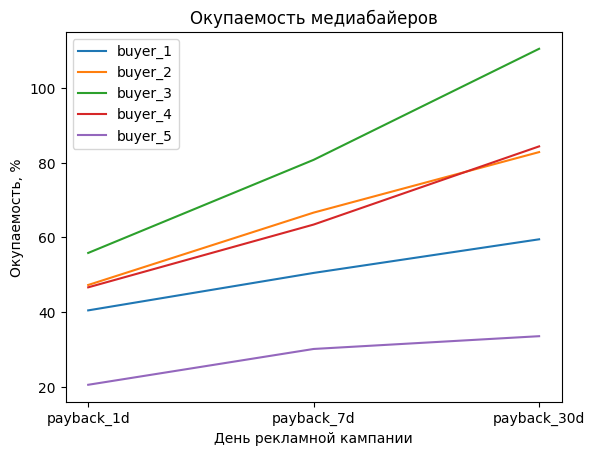

In [ ]:
# построим график динамики совокупной окупаемости байеров

data_payback.set_index('Buyer', inplace=True)
x = ['payback_1d', 'payback_7d', 'payback_30d']
y = data_payback.values.tolist()

for i in range(len(y)):
    plt.plot(x, y[i], label=data_payback.index[i])

plt.title('Окупаемость медиабайеров')
plt.xlabel('День рекламной кампании')
plt.ylabel('Окупаемость, %')
plt.legend()
plt.show()

Лучше всех окупается `buyer_3` (итого 110% на 30 день). Далее следуют `buyer_2` и `buyer_4` (в среднем 83% на 30 день). Проанализируем структуру их кампаний и затрат на них.

In [ ]:
# посмотрим, на какие гео чаще всего настраивают рекламу
# buyer_3, buyer_2 и buyer_4 и сколько на них тратят

buyers = ['buyer_3', 'buyer_2', 'buyer_4']
data_buyers = data.query('Buyer in @buyers').groupby(['Buyer', 'Geo']).\
agg({'Campaign_id':'count', 'Spend':'sum'}).reset_index()

data_buyers.columns = ['Buyer', 'Geo', 'Campaign_count', 'Spend']

# посичтаем доли кампаний и доли затрат на них
data_buyers['Campaign_count_share'] = data_buyers.groupby('Buyer')['Campaign_count'].transform(lambda x: (x/x.sum()*100).round(2))
data_buyers['Spend_share'] = data_buyers.groupby('Buyer')['Spend'].transform(lambda x: (x/x.sum()*100).round(2))

data_buyers

,Buyer,Geo,Campaign_count,Spend,Campaign_count_share,Spend_share
0,buyer_2,cis,5,716.530003,12.82,9.92
1,buyer_2,north america,17,4478.079995,43.59,61.98
2,buyer_2,western europe,17,2030.839998,43.59,28.11
3,buyer_3,north america,6,1953.720009,100.00,100.00
4,buyer_4,cis,2,43.210001,12.50,3.79
5,buyer_4,north america,11,1030.000004,68.75,90.27
6,buyer_4,western europe,3,67.860001,18.75,5.95


Визуализируем данные на круговых диаграммах.

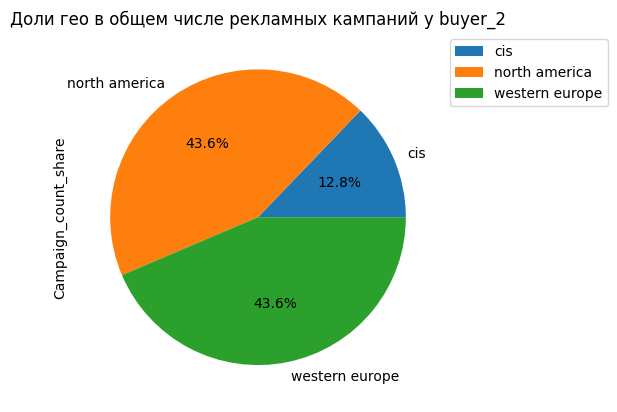

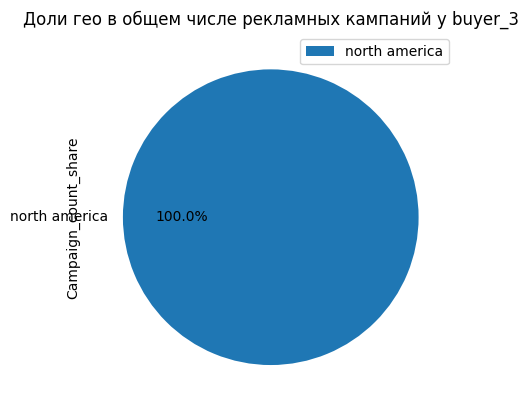

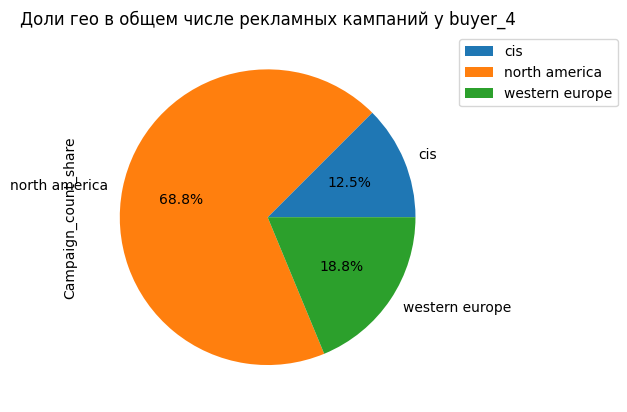

In [ ]:
for b in data_buyers['Buyer'].unique():
  data_buyers.query('Buyer==@b')[['Geo', 'Campaign_count_share']].set_index('Geo').\
  plot(y='Campaign_count_share', kind='pie', autopct='%.1f%%')
  plt.title(f'Доли гео в общем числе рекламных кампаний у {b}')
  plt.legend(bbox_to_anchor=(1, 1));

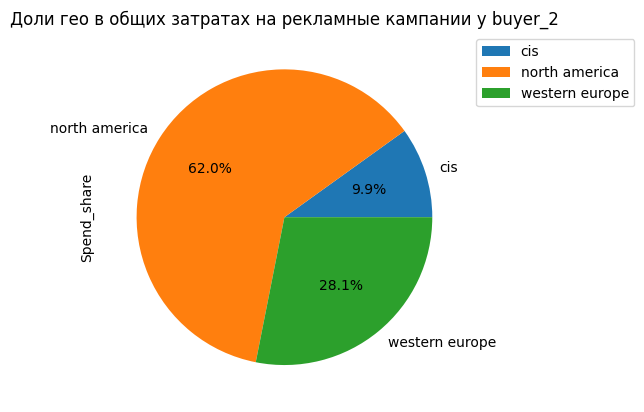

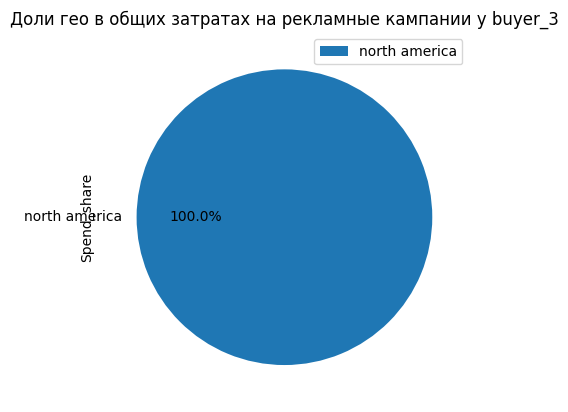

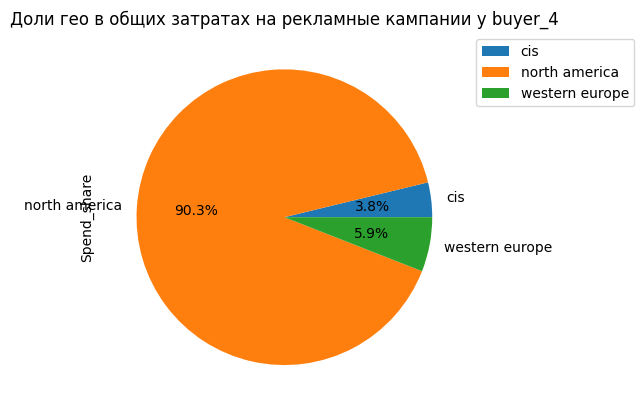

In [ ]:
for b in data_buyers['Buyer'].unique():
  data_buyers.query('Buyer==@b')[['Geo', 'Spend_share']].set_index('Geo').\
  plot(y='Spend_share', kind='pie', autopct='%.1f%%')
  plt.title(f'Доли гео в общих затратах на рекламные кампании у {b}')
  plt.legend(bbox_to_anchor=(1, 1));

У `buyer_3`, `buyer_2` и `buyer_4` на Серевную Америку настроено 100%, 43% и 68% кампаний соответственно от общего числа кампаний. `buyer_2` и `buyer_4` тоже (как и `buyer_3`) больше всего тратят на С.А. (62% и 90% затрат соответственно).

### Кампании в каких гео показали себя хуже всего? В каких лучше?

In [ ]:
# выведем список колонок

data.columns

Index(['Campaign_id', 'Geo', 'Buyer', 'Impressions', 'Clicks', 'Installs',
       'Registrations', 'Spend', 'Revenue_ad1d', 'Revenue_in_app1d',
       'Payers1d', 'Revenue_ad7d', 'Revenue_in_app7d', 'Payers7d',
       'Revenue_ad30d', 'Revenue_in_app30d', 'Payers30d', 'CPI', 'CPC', 'CPM',
       'CR_install', 'CR_registration', 'CTR', 'Revenue_total_1d',
       'Revenue_total_7d', 'Revenue_total_30d'],
      dtype='object')

In [ ]:
# построим сводную таблицу со средними маркетинговыми метриками кампаний по гео
# а также суммарными расходами и выручкой
data_geo = data.groupby('Geo').agg({'CPI': 'mean', 'CPC':'mean', 'CPM':'mean',\
                                    'CTR':'mean', 'CR_install':'mean', 'CR_registration':'mean',\
                                    'Revenue_total_30d':'sum', 'Spend':'sum'})

# добавим колонку с итоговой окупаемостью в каждом гео
data_geo['payback'] = (data_geo['Revenue_total_30d']/data_geo['Spend']*100).round(2)

# удалим колонки с выручкой и затратами
data_geo.drop(['Revenue_total_30d','Spend'], axis=1, inplace=True)

# округлим значения колонок
columns = ['CPI', 'CPC', 'CPM', 'CTR', 'CR_install', 'CR_registration', 'payback']
for c in columns:
  data_geo[c] = data_geo[c].round(3)

# обновим индексы
data_geo = data_geo.reset_index()

In [ ]:
# посмотрим, что получилось

data_geo

,Geo,CPI,CPC,CPM,CTR,CR_install,CR_registration,payback
0,australia oceania,2.155,0.407,9.863,2.430,18.870,16.980,5.63
1,cis,0.181,0.066,1.502,2.475,36.437,14.694,52.91
2,latin america,0.092,0.025,0.787,3.660,30.967,18.560,39.28
3,north africa,0.026,0.010,0.270,2.945,36.670,22.935,10.93
4,north america,0.403,0.170,5.373,3.394,41.086,22.814,76.76
5,tropical africa,0.053,0.015,0.457,3.010,28.450,17.730,15.54
6,western europe,0.343,0.133,3.034,2.349,40.928,24.111,89.16


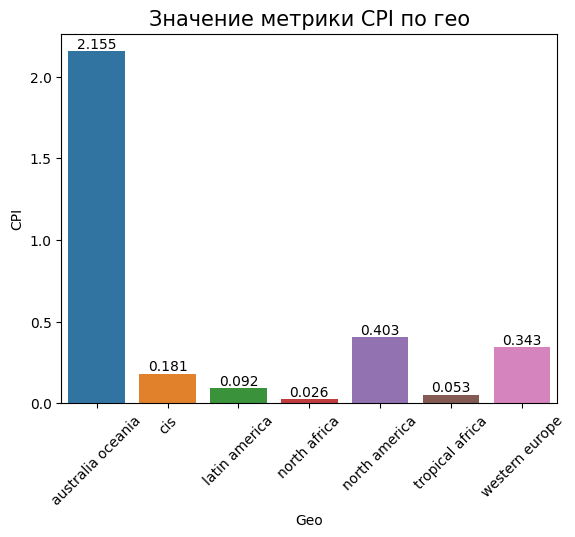

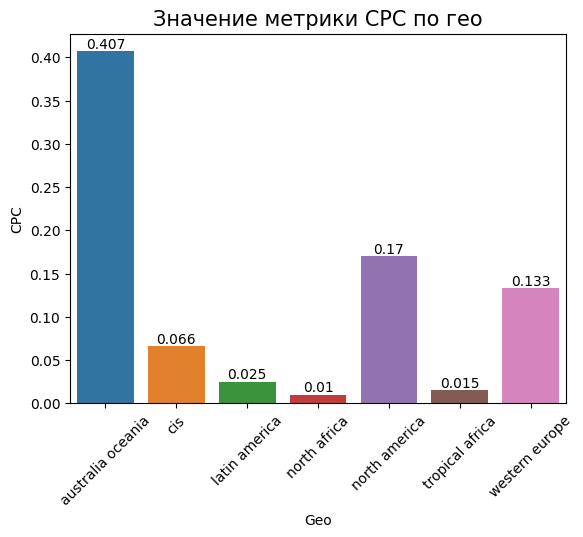

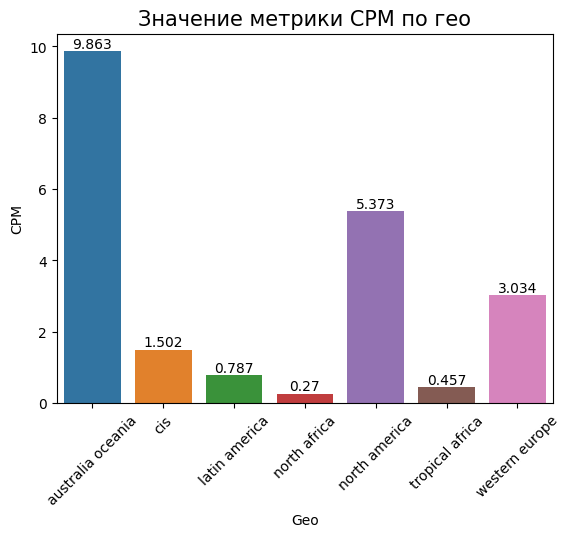

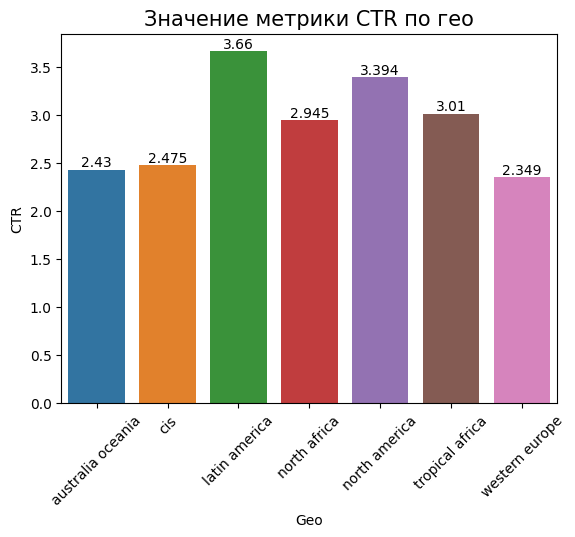

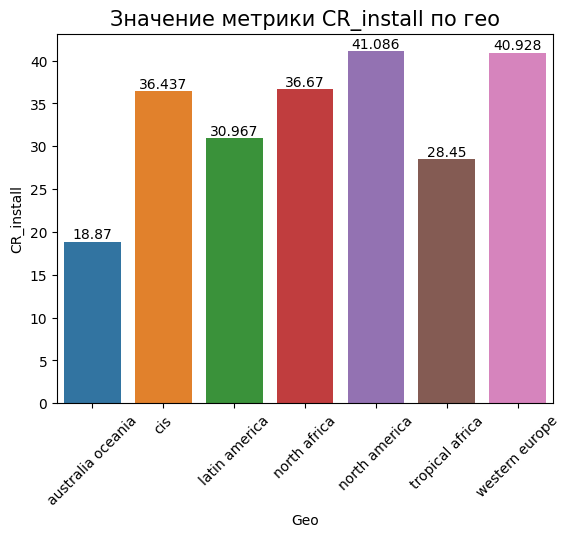

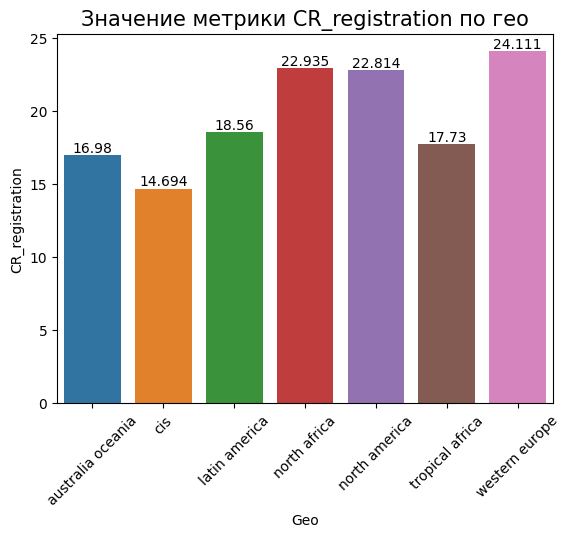

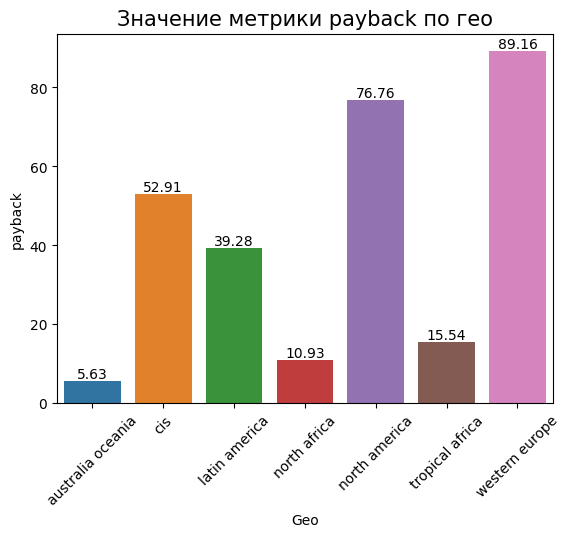

In [ ]:
# выведем столбчатые диаграммы каждой метрики по гео

for c in columns:
  ax = sns.barplot(data=data_geo, x='Geo', y=c)
  ax.bar_label(ax.containers[0])
  ax.tick_params(axis='x', labelrotation=45)
  plt.title(f'Значение метрики {c} по гео', fontsize=15)
  plt.show();

Хуже всего показали себя кампании настроенные на **australia oceania**: самые плохие показатели по всем метрикам, кроме метрики `CR_registration` - по ней второе место с конца. По `CPI`, `CPC`, `CPM` лидирует **north africa** (0.026, 0.010, 0.270 соответсвенно). Лучшие `CTR` в **latin america** и **north america** (3.66 и 3.39 соответсвенно). Самые высокие конверсии в скачивание после перехода по рекламе в  **north america** и **western europe** (по 41%). Конверсия в регистрацию после перехода по рекламе самая высокая в **western europe** (24%), там же и самая высокая окупаемость (89%).

### У каких кампаний дешевле установки (CPI)?

In [ ]:
# сохраним 10 компаний с самым дешевым CPI

best_cpi = data[['Buyer', 'Geo', 'Campaign_id', 'CPI']].sort_values('CPI').head(10)

In [ ]:
# округим значения для удобства

best_cpi['CPI'] = best_cpi['CPI'].round(3)

In [ ]:
# посмотрим на рейтинг топ 10

best_cpi

,Buyer,Geo,Campaign_id,CPI
20,buyer_5,north africa,21,0.025
55,buyer_5,north africa,56,0.027
44,buyer_1,latin america,45,0.035
26,buyer_1,latin america,27,0.046
40,buyer_2,north america,41,0.051
59,buyer_1,tropical africa,60,0.053
23,buyer_1,north america,24,0.055
56,buyer_2,north america,57,0.058
68,buyer_4,north america,69,0.076
86,buyer_2,north america,87,0.079


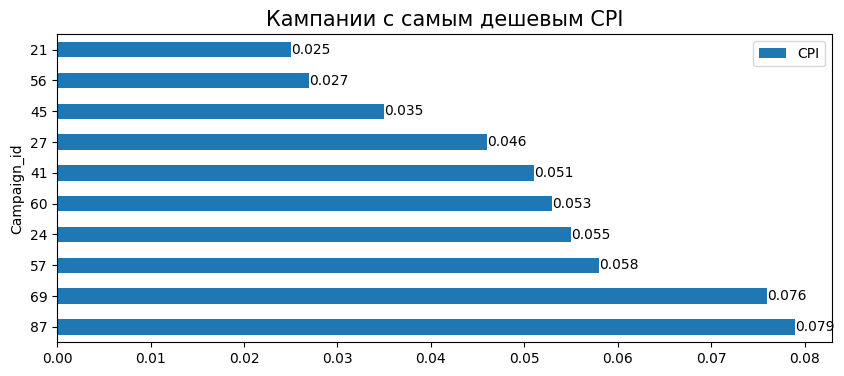

In [ ]:
# выведем диаграмму рейтинга кампаний по CPI

ax = best_cpi.sort_values('CPI', ascending=False).plot(kind='barh', x='Campaign_id', figsize=(10, 4))
ax.bar_label(ax.containers[0])
plt.title('Кампании с самым дешевым CPI', fontsize=15)
plt.ylabel('Campaign_id');

Самый дешевый `CPI` у **21** и **56** кампаний (0.025 и 0.027 соответсвенно). Обе кампании запущены **buyer_5** и настроены на Северную Америку. Остальной рейтинг можно увидеть на диаграмме.

**Вывод**

Наиболее популярные гео по **числу** кампаний и по **затратам** на них:
1. **north america** (55% и 77% соответственно).
2.  **western europe** (25% и 12.5% соответственно).

Наблюдения по медиабайерам:
1. `buyer_2` - **1** место по **числу** (44%) кампаний и **затратам** (39.8%).
2. `buyer_1` - **2** место по **числу** (20%) кампаний и **затратам** (39.7%).
3. `buyer_4` - **3** место по **числу** (18%) кампаний и **4** по **затратам** (6.3%).
4. `buyer_5` - **4** место по **числу** (9.2%) кампаний и **5** по **затратам** (3.5%).
5. `buyer_3` - **5** место по **числу** (6.9%) кампаний и **3** по **затратам** (10.8%).

Лучше всего окупаются кампании у:
1. `buyer_3` (110% от общих затрат). 100% кампаний и затрат - **north america**.
2. `buyer_2` (82%). По 43.6% кампаний - **north america** и **western europe**. Затраты: **north america** - 62% и **western europe** - 28%.
3. `buyer_4` (84%). 68% кампаний - **north america**, 18%  - **western europe**. Затраты: **north america** - 90%, **western europe** - 6%.

Хуже всего кампании настроенные на **australia oceania**: самые плохие показатели по всем метрикам, кроме метрики `Конверсия в регистрацию после перехода по рекламе` - по ней второе место с конца.

По `CPI`, `CPC`, `CPM` лидирует **north africa** (0.026, 0.010, 0.270 соответсвенно). Лучшие `CTR` в **latin america** и **north america** (3.66 и 3.39 соответсвенно). Самые высокие конверсии в скачивание после перехода по рекламе в  **north america** и **western europe** (по 41%). Конверсия в регистрацию после перехода по рекламе самая высокая в **western europe** (24%), там же и самая высокая окупаемость в целом (89%).

Самые дешевые `CPI` у кампаний номер **21** (0.025 ) и **56** (0.027). Обе настроены на **north america** - **buyer_5**.

## Общий вывод

На основе анализа данных и результатов рекламных кампаний медиабайеров можно сделать вывод, что одним из наиболее удачных гео для настройки рекламных кампаний является **north america**. Для кампаний, настроенных на этот гео, характерна высокая окупаемость, высокие показатели `CTR` и конверсии в скачивания и регистрации, а также самые дешевые `CPI`. Также можно выделить **western europe**, как гео с самой высокой окупаемостью в целом и высокими конверсиями в скачивания и регистрации. Самым нерезультативным гео можно назвать **australia oceania** - там самые плохие показатели по всем метрикам.